In [77]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [40]:
cars_df = pd.read_csv('cars-2021-09-30 01-42-33.csv')

In [41]:
cars_df.drop(columns = 'Unnamed: 0', inplace = True)

In [42]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE
0,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,Private Party Or Dealer: Private Party,222,45000.0,Sold,Regular,"<h1 class=""post-title listing-post-title"">22-Y..."
1,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,Private Party Or Dealer: Dealer,245,28000.0,Sold,Regular,"<h1 class=""post-title listing-post-title"">1998..."
2,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,Private Party Or Dealer: Private Party,264,40500.0,Sold,Regular,"<h1 class=""post-title listing-post-title"">1999..."
3,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,Private Party Or Dealer: Private Party,116,13250.0,Sold,Regular,"<h1 class=""post-title listing-post-title"">1998..."
4,https://bringatrailer.com/listing/1996-bmw-m3-48/,Chassis: WBSBG9320TEY73396,1996,"194k Miles Shown, TMU",boston green metallic paint,modena nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Oakville, Ontario, Canada",2021-09-13,Private Party Or Dealer: Private Party,188,9000.0,Sold,Regular,"<h1 class=""post-title listing-post-title"">No R..."


In [43]:
# needed only to remove tags from title column. scraping function updated to make this obsolete in the future.
# from bs4 import BeautifulSoup

In [44]:
# cars_df['TITLE'] = cars_df['TITLE'].apply(lambda x: BeautifulSoup(x).get_text())

In [45]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE
0,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,Private Party Or Dealer: Private Party,222,45000.0,Sold,Regular,22-Years-Owned 1999 BMW M3 Coupe 5-Speed
1,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,Private Party Or Dealer: Dealer,245,28000.0,Sold,Regular,1998 BMW M3 Coupe 5-Speed
2,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,Private Party Or Dealer: Private Party,264,40500.0,Sold,Regular,1999 BMW M3 Coupe 5-Speed
3,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,Private Party Or Dealer: Private Party,116,13250.0,Sold,Regular,1998 BMW M3 Sedan 5-Speed
4,https://bringatrailer.com/listing/1996-bmw-m3-48/,Chassis: WBSBG9320TEY73396,1996,"194k Miles Shown, TMU",boston green metallic paint,modena nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Oakville, Ontario, Canada",2021-09-13,Private Party Or Dealer: Private Party,188,9000.0,Sold,Regular,No Reserve: 1996 BMW M3 Coupe 5-Speed


In [46]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           1115 non-null   object 
 1   VIN           1115 non-null   object 
 2   YEAR          1115 non-null   object 
 3   MILEAGE       1115 non-null   object 
 4   EXT_COLOR     1115 non-null   object 
 5   INT_COLOR     1115 non-null   object 
 6   TRANSMISSION  1115 non-null   object 
 7   BODY_STYLE    1115 non-null   object 
 8   LOCATION      1115 non-null   object 
 9   DATE_SOLD     1115 non-null   object 
 10  SELLER_TYPE   1115 non-null   object 
 11  NUM_PHOTOS    1115 non-null   int64  
 12  SALE_PRICE    1115 non-null   float64
 13  RESULT        1115 non-null   object 
 14  LIMITED       1115 non-null   object 
 15  TITLE         1115 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 139.5+ KB


In [47]:
cars_df['DATE_SOLD'] = pd.to_datetime(cars_df['DATE_SOLD'])

In [48]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           1115 non-null   object        
 1   VIN           1115 non-null   object        
 2   YEAR          1115 non-null   object        
 3   MILEAGE       1115 non-null   object        
 4   EXT_COLOR     1115 non-null   object        
 5   INT_COLOR     1115 non-null   object        
 6   TRANSMISSION  1115 non-null   object        
 7   BODY_STYLE    1115 non-null   object        
 8   LOCATION      1115 non-null   object        
 9   DATE_SOLD     1115 non-null   datetime64[ns]
 10  SELLER_TYPE   1115 non-null   object        
 11  NUM_PHOTOS    1115 non-null   int64         
 12  SALE_PRICE    1115 non-null   float64       
 13  RESULT        1115 non-null   object        
 14  LIMITED       1115 non-null   object        
 15  TITLE         1115 non-null   object  

In [49]:
cars_df[cars_df['YEAR'].str.contains('Unknown')]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE
88,https://bringatrailer.com/listing/bmw-s50b32-e...,Unknown,Unknown,"110k Kilometers (~68k Miles) Reported, TMU",Unknown,Unknown,Unknown,Hard top,"Location: Bedford, Nova Scotia, Canada B4B1J7",2020-12-14,Private Party Or Dealer: Private Party,56,9100.0,Sold,Regular,No Reserve: Euro-Spec BMW S50B32 Engine


In [50]:
cars_df[cars_df['YEAR'].str.contains('Unknown')] = np.nan

In [51]:
cars_df.dropna(how = 'any', inplace = True)

In [52]:
cars_df['VIN'].str.upper()

0       CHASSIS: WBSBG9335XEY80827
1       CHASSIS: WBSBG9326WEY77926
2       CHASSIS: WB5BG9334XEY83671
3       CHASSIS: WBSCD9326WEE08819
4       CHASSIS: WBSBG9320TEY73396
                   ...            
1110    CHASSIS: WBSDX9C52CE784660
1111    CHASSIS: WBSPM9C5XAE202064
1112    CHASSIS: WBSKG9C56CE797855
1113    CHASSIS: WBSWD93558PY42810
1114        VIN: WBSVA93568E041092
Name: VIN, Length: 1114, dtype: object

In [53]:
#validate that VIN starts with letter 'W' and is 17 total characters
def clean_VIN(VIN):
    if re.search('[W]{1}[A-HJ-NPR-Z0-9]{16}', VIN) is not None:
        return re.search('[W]{1}[A-HJ-NPR-Z0-9]{16}', VIN).group(0)
    else:
        return 'Invalid VIN' #can change this to np.nan to drop invalid VINs later on, but VIN is not being used currently

In [54]:
cars_df['VIN'] = cars_df['VIN'].map(clean_VIN)

In [55]:
# cars_df[cars_df['VIN'].isna()]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE


In [21]:
# cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 0 to 1114
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           1114 non-null   object        
 1   VIN           1091 non-null   object        
 2   YEAR          1114 non-null   object        
 3   MILEAGE       1114 non-null   object        
 4   EXT_COLOR     1114 non-null   object        
 5   INT_COLOR     1114 non-null   object        
 6   TRANSMISSION  1114 non-null   object        
 7   BODY_STYLE    1114 non-null   object        
 8   LOCATION      1114 non-null   object        
 9   DATE_SOLD     1114 non-null   datetime64[ns]
 10  SELLER_TYPE   1114 non-null   object        
 11  NUM_PHOTOS    1114 non-null   float64       
 12  SALE_PRICE    1114 non-null   float64       
 13  RESULT        1114 non-null   object        
 14  LIMITED       1114 non-null   object        
 15  TITLE         1114 non-null   object  

In [22]:
# don't need to drop entries only because of invalid VINs - VIN currently not being used
# cars_df.dropna(subset = ['VIN'], inplace = True)

In [56]:
# pulls ZIP code from location
def get_ZIP(location):
    if re.search(r'[0-9]{5}', location) is not None:
        return re.search(r'[0-9]{5}', location).group(0)
    else:
        return np.nan

In [57]:
cars_df['ZIP'] = cars_df['LOCATION'].map(get_ZIP)

In [58]:
# categorizes transmission type based on keywords
def get_transmission_type(transmission):
    automatic_keywords = ['auto', 'sequential', 'smg', 'dct', 'sequential', 'clutch']
    if any(word in transmission.lower() for word in automatic_keywords):
        return 'Automatic'
    else:
        return 'Manual'

In [59]:
cars_df['TRANSMISSION_TYPE'] = cars_df['TRANSMISSION'].map(get_transmission_type)

In [60]:
cars_df[['TRANSMISSION', 'TRANSMISSION_TYPE']].head(10)

,TRANSMISSION,TRANSMISSION_TYPE
0,Five-Speed Manual Transmission,Manual
1,Five-Speed Manual Transmission,Manual
2,Five-Speed Manual Transmission,Manual
3,Five-Speed Manual Transmission,Manual
4,Five-Speed Manual Transmission,Manual
5,Five-Speed Manual Transmission,Manual
6,Five-Speed Manual Transmission,Manual
7,Five-Speed Automatic Transmission,Automatic
8,5-Speed Manual Transmission,Manual
9,Five-Speed Manual Transmission,Manual


In [61]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE,ZIP,TRANSMISSION_TYPE
0,https://bringatrailer.com/listing/1999-bmw-m3-...,WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,Private Party Or Dealer: Private Party,222.0,45000.0,Sold,Regular,22-Years-Owned 1999 BMW M3 Coupe 5-Speed,92833,Manual
1,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,Private Party Or Dealer: Dealer,245.0,28000.0,Sold,Regular,1998 BMW M3 Coupe 5-Speed,97209,Manual
2,https://bringatrailer.com/listing/1999-bmw-m3-...,WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,Private Party Or Dealer: Private Party,264.0,40500.0,Sold,Regular,1999 BMW M3 Coupe 5-Speed,97701,Manual
3,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,Private Party Or Dealer: Private Party,116.0,13250.0,Sold,Regular,1998 BMW M3 Sedan 5-Speed,33852,Manual
4,https://bringatrailer.com/listing/1996-bmw-m3-48/,WBSBG9320TEY73396,1996,"194k Miles Shown, TMU",boston green metallic paint,modena nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Oakville, Ontario, Canada",2021-09-13,Private Party Or Dealer: Private Party,188.0,9000.0,Sold,Regular,No Reserve: 1996 BMW M3 Coupe 5-Speed,NaN,Manual


In [62]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.lower()

In [63]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.replace('private party or dealer:','')

In [64]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.strip()

In [65]:
cars_df['SELLER_TYPE'].mask(cars_df['SELLER_TYPE'] == 'unknown', inplace = True)

In [66]:
#extracts state from location field
def get_state(location):
    states = pd.read_csv('states.csv')
    for state in states['State']:
        if state in location:
            return state
    for index, abbreviation in enumerate(states['Abbreviation']):
        if abbreviation in location:
            return states.loc[index]['State']
    return np.nan

In [67]:
cars_df['STATE'] = cars_df['LOCATION'].map(get_state)

In [68]:
cars_df['STATE']

0       California
1           Oregon
2           Oregon
3          Florida
4              NaN
           ...    
1110    California
1111      Michigan
1112       Arizona
1113    California
1114    California
Name: STATE, Length: 1114, dtype: object

In [69]:
cars_df.dropna(subset = ['STATE'], inplace = True)

In [70]:
# remove extraneous characters, interpret 'k' as x1000, convert to int and return
def clean_mileage(mileage):
    mileage = mileage.lower()
    if 'km' in mileage or 'kilometer' in mileage:
        return np.nan
    mileage = mileage.replace(',','')
    mileage = mileage.replace('~','')
    mileage = mileage.replace('x','0')
    mileage = mileage.replace('k','000')
    if re.search(r'[0-9]+', mileage):
        return int(re.search(r'[0-9]+', mileage).group(0))
    else:
        return np.nan

In [71]:
cars_df['MILEAGE_CLEAN'] = cars_df['MILEAGE'].map(clean_mileage)

In [72]:
cars_df[['MILEAGE', 'MILEAGE_CLEAN']].head(50)

,MILEAGE,MILEAGE_CLEAN
0,66k Miles,66000.0
1,103k Miles,103000.0
2,81k Miles,81000.0
3,89k Miles Shown,89000.0
5,162K Miles,162000.0
6,Unknown,0.0
7,54k Miles,54000.0
8,150k Miles,150000.0
9,118k Miles,118000.0
10,101k Miles Shown,101000.0


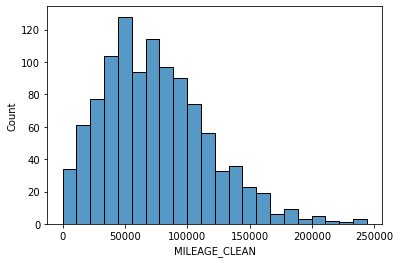

In [73]:
sns.histplot(cars_df['MILEAGE_CLEAN']);

In [74]:
cars_df['MILEAGE_CLEAN'].mask(cars_df['MILEAGE_CLEAN'] == 0, inplace = True)

In [75]:
cars_df.dropna(subset = ['MILEAGE_CLEAN'], inplace = True)

In [78]:
cars_df[cars_df['MILEAGE_CLEAN'] < 1000]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN
375,https://bringatrailer.com/listing/1995-bmw-m3-23/,WBSBF9325SEH07962,1995,100 Miles,Unknown,Unknown,5-Speed Manual Transmisison,Hard top,"Location: Ridgefield, Connecticut 06877",2017-02-10,dealer,202.0,154000.0,Reserve not met,Limited,100-Mile 1995 BMW M3 Lightweight,06877,Manual,Connecticut,100.0
828,https://bringatrailer.com/listing/2004-bmw-m3-21/,WBSBL93454PN59133,2004,176 miles,carbon black metallic,black nappa leather,6-speed SMG II Transmission,Hard top,"Location: Makawao, Hawaii 96768",2018-08-09,private party,147.0,34250.0,Reserve not met,Regular,176-Mile 2004 BMW M3 Coupe,96768,Automatic,Hawaii,176.0
940,https://bringatrailer.com/listing/2012-bmw-m3-crt-lightweight/,WBSPK91060E810823,2012,711 Miles Shown,frozen polar silver metallic,orange leather upholstery,7-Speed Dual-Clutch Transmission,Hard top,"Location: Huntington Station, New York 11746",2021-08-31,dealer,127.0,116000.0,Reserve not met,Limited,700-Mile 2012 BMW M3 CRT Lightweight Sedan,11746,Automatic,New York,711.0
1109,https://bringatrailer.com/listing/2013-bmw-m3-9/,WBSDX9C59DE785371,2013,18s Miles Shown,ruby black metallic,novillo black leather,M-DCT Transmission,Convertible,"Location: Pittsburgh, Pennsylvania 15213",2017-11-01,private party,90.0,37000.0,Sold,Regular,No Reserve: 18K-Mile 2013 BMW M3 Convertible,15213,Automatic,Pennsylvania,18.0


In [79]:
#I verified extreme low mileage cars manually. Corrected one  from 18 to 18000.
cars_df.loc[1109, 'MILEAGE_CLEAN'] = 18000

In [80]:
cars_df[cars_df['MILEAGE_CLEAN'] < 1000]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN
375,https://bringatrailer.com/listing/1995-bmw-m3-23/,WBSBF9325SEH07962,1995,100 Miles,Unknown,Unknown,5-Speed Manual Transmisison,Hard top,"Location: Ridgefield, Connecticut 06877",2017-02-10,dealer,202.0,154000.0,Reserve not met,Limited,100-Mile 1995 BMW M3 Lightweight,06877,Manual,Connecticut,100.0
828,https://bringatrailer.com/listing/2004-bmw-m3-21/,WBSBL93454PN59133,2004,176 miles,carbon black metallic,black nappa leather,6-speed SMG II Transmission,Hard top,"Location: Makawao, Hawaii 96768",2018-08-09,private party,147.0,34250.0,Reserve not met,Regular,176-Mile 2004 BMW M3 Coupe,96768,Automatic,Hawaii,176.0
940,https://bringatrailer.com/listing/2012-bmw-m3-crt-lightweight/,WBSPK91060E810823,2012,711 Miles Shown,frozen polar silver metallic,orange leather upholstery,7-Speed Dual-Clutch Transmission,Hard top,"Location: Huntington Station, New York 11746",2021-08-31,dealer,127.0,116000.0,Reserve not met,Limited,700-Mile 2012 BMW M3 CRT Lightweight Sedan,11746,Automatic,New York,711.0


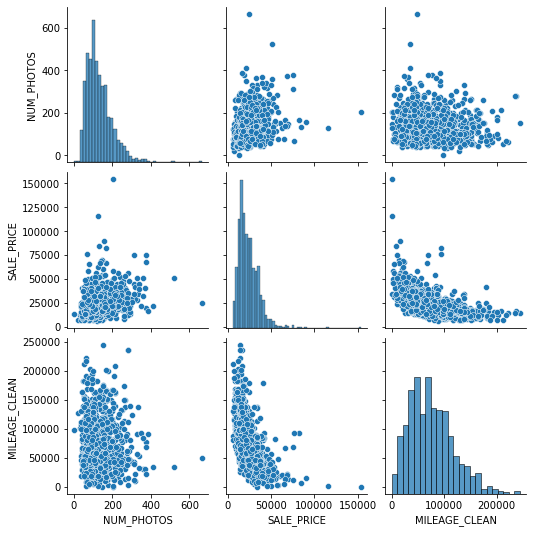

In [81]:
sns.pairplot(cars_df);

In [82]:
# categorizes exterior color into more general buckets so that dummies can be used

def get_ext_color(ext_color):
    #e36 colors: Alpine White II, Alpine White III, Ice White, Mugello Red, Brilliant Red, Dakar Yellow
    #diamond black metallic, cosmos black metallic, sterling silver metallic, arctic silver metallic,
    #polaris metallic (silver) ,avus blue metallic, glacier blue metallic, daytona violet metallic, boston green metallic,
    #british racing green
    
    #e46 colors: Alpine White III, Imola Red II, Jet Black, Laguna Seca Blue, Carbon Black metallic
    #Black Sapphire metallic, Titanium Silver metallic, Steel Grey metallic, Silver Grey metallic,
    #Topaz Blue metallic, Mystic Blue metallic, Interlagos Blue metallic, Fern Green metallic, Oxford Green II metallic,
    #Phoenix Yellow metallic
    
    #e92 colors: alpine white III, jet black, sparkling graphite metallic (gray), space grey metallic, mineral white metallic,
    #silverstone II metallic (silver), interlagos blue metallic, le mans blue metallic, jerez black metallic
    #melbourne red metallic, azurite black metallic, diopside black metallic, aventurine silver metallic,
    #ruby black metallic, moonstone metallic (silver)
    
    white_color_keywords = ['white', 'alpine', 'weiss', 'mineral']
    red_color_keywords = ['red', 'mugello', 'imola', 'melbourne', 'hellrot']
    yellow_color_keywords = ['yellow', 'dakar', 'phoenix']
    green_color_keywords = ['green', 'british racing', 'boston', 'fern', 'oxford']
    black_color_keywords = ['black', 'diamond', 'cosmos', 'carbon', 'sapphire', 'jet', 'jerez', 'azurite', 'diopside', 'ruby']
    silver_color_keywords = ['silver', 'sterling', 'arctic', 'polaris', 'titanium', 'aventurine', 'moonstone', 'arktis', 'silber']
    gray_color_keywords = ['gray', 'grey', 'steel', 'graphite', 'space']
    blue_color_keywords = ['blue', 'blau', 'estoril', 'avus', 'glacier', 'laguna seca', 'topaz', 'topas', 'mystic', 'interlagos', 'le mans']
    violet_color_keywords = ['violet', 'daytona']
    orange_color_keywords = ['orange', 'byzanz', 'fire', 'fyre']
    ext_color = ext_color.lower()

    if any(color in ext_color for color in white_color_keywords):
        return 'White'
    elif any(color in ext_color for color in red_color_keywords):
        return 'Red'
    elif any(color in ext_color for color in yellow_color_keywords):
        return 'Yellow'
    elif any(color in ext_color for color in green_color_keywords):
        return 'Green'
    elif any(color in ext_color for color in black_color_keywords):
        return 'Black'
    elif any(color in ext_color for color in silver_color_keywords):
        return 'Silver'
    elif any(color in ext_color for color in gray_color_keywords):
        return 'Gray'
    elif any(color in ext_color for color in blue_color_keywords):
        return 'Blue'
    elif any(color in ext_color for color in violet_color_keywords):
        return 'Violet'
    elif any(color in ext_color for color in orange_color_keywords):
        return 'Orange'
    else:
        return 'Unknown'
    
    


In [83]:
cars_df['EXT_COLOR_CLEANED'] = cars_df['EXT_COLOR'].map(get_ext_color)

In [84]:
cars_df[['EXT_COLOR', 'EXT_COLOR_CLEANED']].head(50)

,EXT_COLOR,EXT_COLOR_CLEANED
0,estoril blue metallic,Blue
1,alpine white,White
2,estoril blue metallic paint,Blue
3,titanium silver metallic,Silver
5,brilliant red paint,Red
7,arctic silver paint,Silver
8,estoril blue metallic paint,Blue
9,arctic silver metallic paint,Silver
10,hellrot red paint,Red
11,arctic silver metallic,Silver


In [85]:
cars_df['EXT_COLOR_CLEANED'].value_counts()

Silver     220
Black      211
Blue       159
White      130
Red        110
Unknown    109
Gray        45
Yellow      30
Green       20
Violet      18
Orange       8
Name: EXT_COLOR_CLEANED, dtype: int64

In [86]:
cars_df[cars_df['EXT_COLOR_CLEANED'] == 'Unknown'].head(60)

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,...,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN,EXT_COLOR_CLEANED
170,https://bringatrailer.com/listing/1995-bmw-m3-133/,WBSBF9320SEH00806,1995,151k Miles Shown,Unknown,Unknown,Five-Speed Manual Transmission,Hard top,"Location: Danville, California 94526",2019-12-24,...,170.0,16000.0,Sold,Regular,1995 BMW M3,94526,Manual,California,151000.0,Unknown
193,https://bringatrailer.com/listing/1995-bmw-m3-121/,WBSBF932XSEH02708,1995,116k Miles Shown,Unknown,Unknown,Five-Speed Manual Transmission,Hard top,"Location: Seymour, Indiana 47274",2019-09-17,...,124.0,13750.0,Reserve not met,Regular,1995 BMW M3 Coupe 5-Speed,47274,Manual,Indiana,116000.0,Unknown
249,https://bringatrailer.com/listing/1999-bmw-m3-53/,WBSBG9332XEY80767,1999,117k Miles,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Minneapolis, Minnesota 55416",2019-01-25,...,99.0,8450.0,Reserve not met,Regular,1999 BMW M3,55416,Manual,Minnesota,117000.0,Unknown
251,https://bringatrailer.com/listing/1999-bmw-m3-52/,WBSBG9337XEY82840,1999,183k Miles,Unknown,Unknown,5-Speed Manual,Hard top,"Location: Bonney Lake, Washington 98391",2019-01-17,...,47.0,16000.0,Sold,Regular,Modified 1999 BMW M3 5-Speed,98391,Manual,Washington,183000.0,Unknown
267,https://bringatrailer.com/listing/1995-bmw-m3-83/,WBSBF9320SEH04824,1995,"202,814 Miles Shown",Unknown,Unknown,5-Speed Manual Gearbox,Hard top,"Location: Fair Oaks, California 95628",2018-11-14,...,83.0,11899.0,Sold,Regular,No Reserve: 1995 BMW M3 Coupe 5-Speed,95628,Manual,California,202814.0,Unknown
276,https://bringatrailer.com/listing/1995-bmw-m3-77/,WBSBF9328SEH00584,1995,182k Miles Shown,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Walnut Creek, California",2018-10-09,...,55.0,11000.0,Sold,Regular,No Reserve: Modified 1995 BMW M3 Coupe 5-Speed,NaN,Manual,California,182000.0,Unknown
279,https://bringatrailer.com/listing/1997-bmw-m3-90/,WBSBG932XVEY75403,1997,153k Indicated Miles,Unknown,Unknown,5-Speed Manual Gearbox,Hard top,"Location: Saint Louis, Missouri 63108",2018-10-01,...,62.0,17500.0,Sold,Regular,1997 BMW M3 Coupe Track Car,63108,Manual,Missouri,153000.0,Unknown
282,https://bringatrailer.com/listing/1998-bmw-m3-convertible-21/,WBSBK9335WEC42125,1998,45k Miles Shown,Unknown,Unknown,5-Speed Manual Gearbox,Convertible,"Location: San Rafael, California 94901",2018-09-25,...,73.0,17777.0,Sold,Regular,45k-Mile 1998 BMW M3 Convertible,94901,Manual,California,45000.0,Unknown
287,https://bringatrailer.com/listing/1997-bmw-m3-88/,WBSBG9328VEY77053,1997,"57,275 Miles Shown",Unknown,Unknown,5-Speed Manual,Hard top,"Location: Madison, Alabama",2018-09-10,...,94.0,24500.0,Sold,Regular,1997 BMW M3 Track Car,NaN,Manual,Alabama,57275.0,Unknown
296,https://bringatrailer.com/listing/1998-bmw-m3-16/,WBSBG9327WEY77403,1998,40k Miles Shown,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Indianapolis, Indiana 46268",2018-07-12,...,66.0,21250.0,Sold,Regular,40K-Mile 1998 BMW M3 Coupe 5-Speed,46268,Manual,Indiana,40000.0,Unknown


In [87]:
cars_df['EXT_COLOR_CLEANED'].mask(cars_df['EXT_COLOR_CLEANED'] == 'Unknown', inplace = True)

In [88]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1114
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   URL                1060 non-null   object        
 1   VIN                1060 non-null   object        
 2   YEAR               1060 non-null   object        
 3   MILEAGE            1060 non-null   object        
 4   EXT_COLOR          1060 non-null   object        
 5   INT_COLOR          1060 non-null   object        
 6   TRANSMISSION       1060 non-null   object        
 7   BODY_STYLE         1060 non-null   object        
 8   LOCATION           1060 non-null   object        
 9   DATE_SOLD          1060 non-null   datetime64[ns]
 10  SELLER_TYPE        1059 non-null   object        
 11  NUM_PHOTOS         1060 non-null   float64       
 12  SALE_PRICE         1060 non-null   float64       
 13  RESULT             1060 non-null   object        
 14  LIMITED 

In [89]:
cars_df.dropna(how = 'any', inplace = True)

In [90]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 1111
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   URL                908 non-null    object        
 1   VIN                908 non-null    object        
 2   YEAR               908 non-null    object        
 3   MILEAGE            908 non-null    object        
 4   EXT_COLOR          908 non-null    object        
 5   INT_COLOR          908 non-null    object        
 6   TRANSMISSION       908 non-null    object        
 7   BODY_STYLE         908 non-null    object        
 8   LOCATION           908 non-null    object        
 9   DATE_SOLD          908 non-null    datetime64[ns]
 10  SELLER_TYPE        908 non-null    object        
 11  NUM_PHOTOS         908 non-null    float64       
 12  SALE_PRICE         908 non-null    float64       
 13  RESULT             908 non-null    object        
 14  LIMITED  

In [91]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,...,NUM_PHOTOS,SALE_PRICE,RESULT,LIMITED,TITLE,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN,EXT_COLOR_CLEANED
0,https://bringatrailer.com/listing/1999-bmw-m3-138/,WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,...,222.0,45000.0,Sold,Regular,22-Years-Owned 1999 BMW M3 Coupe 5-Speed,92833,Manual,California,66000.0,Blue
1,https://bringatrailer.com/listing/1998-bmw-m3-109/,WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,...,245.0,28000.0,Sold,Regular,1998 BMW M3 Coupe 5-Speed,97209,Manual,Oregon,103000.0,White
2,https://bringatrailer.com/listing/1999-bmw-m3-136/,WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,...,264.0,40500.0,Sold,Regular,1999 BMW M3 Coupe 5-Speed,97701,Manual,Oregon,81000.0,Blue
3,https://bringatrailer.com/listing/1998-bmw-m3-sedan-70/,WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,...,116.0,13250.0,Sold,Regular,1998 BMW M3 Sedan 5-Speed,33852,Manual,Florida,89000.0,Silver
5,https://bringatrailer.com/listing/1995-bmw-m3-206/,WBSBF9323SEH03781,1995,162K Miles,brilliant red paint,black nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Muncie, Indiana 47303",2021-09-10,...,215.0,14000.0,Sold,Regular,No Reserve: 22-Years Owned 1995 BMW M3 Coupe 5-Speed,47303,Manual,Indiana,162000.0,Red


In [92]:
cars_df.to_csv('cars_cleaned.csv')